In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,ShuffleSplit,cross_val_score,StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import Counter
import seaborn as sns

In [0]:
data = pd.read_csv("drive/My Drive/Thesis/Wildfire.csv")
X = data.loc[:,['NDVI','LST','Burned_Area','SM','SUSM']].values.astype('float32')
nor_X = preprocessing.normalize(X)
Y = data.loc[:,['Class']].values.astype('int')
labelencoder_y_1 = LabelEncoder()
Y = labelencoder_y_1.fit_transform(Y)

In [0]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = data.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [0]:
np.random.seed(1080)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20)

In [0]:
pd.value_counts(y_test).plot.bar()
plt.title('class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [0]:
kfold = StratifiedShuffleSplit(n_splits=10, test_size=0.15, random_state=12)
training_accuracy = []
testing_accuracy = []
epochs=10
for train, test in kfold.split(X_train, y_train):

  clf = MLPClassifier(solver='sgd',learning_rate='adaptive',momentum=0.9, activation='relu',alpha=5, batch_size='auto',verbose=True,n_iter_no_change = epochs)
  clf.fit(X[train],Y[train])
  model = clf
  
  #training accuracy
  y_tr_pred = clf.predict(X[train])
  results_tr = cross_val_score(model, X[train] ,y_tr_pred, cv = kfold,verbose=1)
  training_accuracy.append(results_tr.max()*100.0)
  
  #testing Accuracy
  y_te_pred = clf.predict(X_test)
  results = cross_val_score(model, X_test ,y_te_pred, cv = kfold,verbose=1)
  testing_accuracy.append(results.max()*100.0)
  
  print("Training Accuracy (Shuffle Split) : %.3f%% (%.3f%%)" % (results_tr.max()*100.0, results_tr.std()*100.0))
  print("Prediction Accuracy (Shuffle Split) : %.3f%% (%.3f%%)" % (results.max()*100.0, results.std()*100.0))

Iteration 1, loss = 0.95918017
Iteration 2, loss = 0.41412313
Iteration 3, loss = 0.38473055
Iteration 4, loss = 0.36406503
Iteration 5, loss = 0.34863988
Iteration 6, loss = 0.33818369
Iteration 7, loss = 0.33019605
Iteration 8, loss = 0.32472213
Iteration 9, loss = 0.32070491
Iteration 10, loss = 0.31707818
Iteration 11, loss = 0.31499817
Iteration 12, loss = 0.31384742
Iteration 13, loss = 0.31222949
Iteration 14, loss = 0.31272689
Iteration 15, loss = 0.31062250
Iteration 16, loss = 0.31132395
Iteration 17, loss = 0.31030705
Iteration 18, loss = 0.31026238
Iteration 19, loss = 0.30978468
Iteration 20, loss = 0.30953694
Iteration 21, loss = 0.30951026
Iteration 22, loss = 0.30978915
Iteration 23, loss = 0.30925891
Iteration 24, loss = 0.30944570
Iteration 25, loss = 0.30964592
Iteration 26, loss = 0.30936845
Iteration 27, loss = 0.30918822
Iteration 28, loss = 0.30940547
Iteration 29, loss = 0.30892203
Iteration 30, loss = 0.32184831
Iteration 31, loss = 0.31845508
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.35401642
Iteration 2, loss = 0.26021198
Iteration 3, loss = 0.19806223
Iteration 4, loss = 0.15075650
Iteration 5, loss = 0.11474940
Iteration 6, loss = 0.08734233
Iteration 7, loss = 0.06648125
Iteration 8, loss = 0.05060268
Iteration 9, loss = 0.03851660
Iteration 10, loss = 0.02931719
Iteration 11, loss = 0.02231499
Iteration 12, loss = 0.01698521
Iteration 13, loss = 0.01292842
Iteration 14, loss = 0.00984056
Iteration 15, loss = 0.00749021
Iteration 16, loss = 0.00570123
Iteration 17, loss = 0.00433953
Iteration 18, loss = 0.00330317
Iteration 19, loss = 0.00251848
Iteration 20, loss = 0.00196939
Iteration 21, loss = 0.00165080
Iteration 22, loss = 0.00144353
Iteration 23, loss = 0.00129399
Iteration 24, loss = 0.00118496
Iteration 25, loss = 0.00110494
Iteration 26, loss = 0.00104580
Iteration 27, loss = 0.00100185
Iteration 28, loss = 0.00096902
Iteration 29, loss = 0.00094439
Iteration 30, loss = 0.00092585
Iteration 31, loss = 0.00091186
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 20.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.29456628
Iteration 3, loss = 0.27185423
Iteration 4, loss = 0.25089335
Iteration 5, loss = 0.23154863
Iteration 6, loss = 0.21369546
Iteration 7, loss = 0.19721882
Iteration 8, loss = 0.18201258
Iteration 9, loss = 0.16797880
Iteration 10, loss = 0.15502707
Iteration 11, loss = 0.14307396
Iteration 12, loss = 0.13204248
Iteration 13, loss = 0.12186156
Iteration 14, loss = 0.11246563
Iteration 15, loss = 0.10379415
Iteration 16, loss = 0.09579127
Iteration 17, loss = 0.08840544
Iteration 18, loss = 0.08158909
Iteration 19, loss = 0.07529829
Iteration 20, loss = 0.06949254
Iteration 21, loss = 0.06413443
Iteration 22, loss = 0.05918945
Iteration 23, loss = 0.05462575
Iteration 24, loss = 0.05041392
Iteration 25, loss = 0.04652684
Iteration 26, loss = 0.04293946
Iteration 27, loss = 0.03962868
Iteration 28, loss = 0.03657318
Iteration 29, loss = 0.03375326
Iteration 30, loss = 0.03115077
Iteration 31, loss = 0.02874894
Iteration 32, loss = 0.0

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     33847
           1       0.00      0.00      0.00      3774

    accuracy                           0.90     37621
   macro avg       0.45      0.50      0.47     37621
weighted avg       0.81      0.90      0.85     37621

Training Accuracy (Shuffle Split) : 100.000% (0.000%)
Prediction Accuracy (Shuffle Split) : 100.000% (0.000%)
Iteration 1, loss = 0.88426854
Iteration 2, loss = 0.41425557
Iteration 3, loss = 0.38557127
Iteration 4, loss = 0.36511289
Iteration 5, loss = 0.35034152
Iteration 6, loss = 0.33965489
Iteration 7, loss = 0.33166747
Iteration 8, loss = 0.32589005
Iteration 9, loss = 0.32154356
Iteration 10, loss = 0.32002536
Iteration 11, loss = 0.31670827
Iteration 12, loss = 0.31574657
Iteration 13, loss = 0.31402766
Iteration 14, loss = 0.31298845
Iteration 15, loss = 0.31281513
Iteration 16, loss = 0.31312118
Iteration 17, loss = 0.31225098
Iteration 18, loss = 0.31275

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.31164048
Iteration 2, loss = 0.14232214
Iteration 3, loss = 0.12107091
Iteration 4, loss = 0.10510848
Iteration 5, loss = 0.09307183
Iteration 6, loss = 0.08415779
Iteration 7, loss = 0.07757818
Iteration 8, loss = 0.07242012
Iteration 9, loss = 0.06860781
Iteration 10, loss = 0.06543858
Iteration 11, loss = 0.06309820
Iteration 12, loss = 0.06156440
Iteration 13, loss = 0.06028812
Iteration 14, loss = 0.05948571
Iteration 15, loss = 0.05863422
Iteration 16, loss = 0.05803001
Iteration 17, loss = 0.05764203
Iteration 18, loss = 0.05742008
Iteration 19, loss = 0.05705013
Iteration 20, loss = 0.05691184
Iteration 21, loss = 0.05666510
Iteration 22, loss = 0.05663035
Iteration 23, loss = 0.05649246
Iteration 24, loss = 0.05656142
Iteration 25, loss = 0.05630609
Iteration 26, loss = 0.05643778
Iteration 27, loss = 0.05612313
Iteration 28, loss = 0.05634833
Iteration 29, loss = 0.05625758
Iteration 30, loss = 0.05607296
Iteration 31, loss = 0.05598787
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 23.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 1.03036843
Iteration 2, loss = 0.17630195
Iteration 3, loss = 0.16485098
Iteration 4, loss = 0.15522861
Iteration 5, loss = 0.14787368
Iteration 6, loss = 0.14070830
Iteration 7, loss = 0.13410011
Iteration 8, loss = 0.12752084
Iteration 9, loss = 0.12233399
Iteration 10, loss = 0.11686681
Iteration 11, loss = 0.11226550
Iteration 12, loss = 0.10821973
Iteration 13, loss = 0.10395740
Iteration 14, loss = 0.10004492
Iteration 15, loss = 0.09674070
Iteration 16, loss = 0.09312979
Iteration 17, loss = 0.09103807
Iteration 18, loss = 0.08855662
Iteration 19, loss = 0.08574281
Iteration 20, loss = 0.08380435
Iteration 21, loss = 0.08207706
Iteration 22, loss = 0.07977847
Iteration 23, loss = 0.07804645
Iteration 24, loss = 0.07648727
Iteration 25, loss = 0.07483238
Iteration 26, loss = 0.07378160
Iteration 27, loss = 0.07264174
Iteration 28, loss = 0.07086966
Iteration 29, loss = 0.06994415
Iteration 30, loss = 0.06933702
Iteration 31, loss = 0.06815720
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  9.9min finished



----------------------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     33847
           1       0.98      0.13      0.22      3774

    accuracy                           0.91     37621
   macro avg       0.94      0.56      0.59     37621
weighted avg       0.92      0.91      0.88     37621

Training Accuracy (Shuffle Split) : 98.770% (0.000%)
Prediction Accuracy (Shuffle Split) : 98.689% (0.000%)
Iteration 1, loss = inf
Iteration 2, loss = 0.40731704
Iteration 3, loss = 0.38151959
Iteration 4, loss = 0.36205004
Iteration 5, loss = 0.34827758
Iteration 6, loss = 0.33808059
Iteration 7, loss = 0.33060867
Iteration 8, loss = 0.32609815
Iteration 9, loss = 0.32213391
Iteration 10, loss = 0.31914527
Iteration 11, loss = 0.31665519
Iteration 12, loss = 0.31556265
Iteration 13, loss = 0.31422340
Iteration 14, loss = 0.31389366
Iteration 15, loss = 0.31295545
Iteration 16, loss = 0.31298801
Iteration 17, loss = 0.31186196
I

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.23005640
Iteration 3, loss = 0.17510909
Iteration 4, loss = 0.13328555
Iteration 5, loss = 0.10145126
Iteration 6, loss = 0.07722036
Iteration 7, loss = 0.05877684
Iteration 8, loss = 0.04473841
Iteration 9, loss = 0.03405297
Iteration 10, loss = 0.02591966
Iteration 11, loss = 0.01972894
Iteration 12, loss = 0.01501682
Iteration 13, loss = 0.01143016
Iteration 14, loss = 0.00870015
Iteration 15, loss = 0.00662218
Iteration 16, loss = 0.00504052
Iteration 17, loss = 0.00383664
Iteration 18, loss = 0.00292094
Iteration 19, loss = 0.00224006
Iteration 20, loss = 0.00181318
Iteration 21, loss = 0.00157105
Iteration 22, loss = 0.00139936
Iteration 23, loss = 0.00127118
Iteration 24, loss = 0.00117504
Iteration 25, loss = 0.00110270
Iteration 26, loss = 0.00104813
Iteration 27, loss = 0.00100687
Iteration 28, loss = 0.00097561
Iteration 29, loss = 0.00095191
Iteration 30, loss = 0.00093391
Iteration 31, loss = 0.00092023
Iteration 32, loss = 0.0

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 20.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.13952028
Iteration 2, loss = 0.12847922
Iteration 3, loss = 0.11857304
Iteration 4, loss = 0.10943066
Iteration 5, loss = 0.10099319
Iteration 6, loss = 0.09320627
Iteration 7, loss = 0.08601976
Iteration 8, loss = 0.07938735
Iteration 9, loss = 0.07326631
Iteration 10, loss = 0.06761724
Iteration 11, loss = 0.06240372
Iteration 12, loss = 0.05759218
Iteration 13, loss = 0.05315163
Iteration 14, loss = 0.04905346
Iteration 15, loss = 0.04527128
Iteration 16, loss = 0.04178074
Iteration 17, loss = 0.03855939
Iteration 18, loss = 0.03558662
Iteration 19, loss = 0.03284366
Iteration 20, loss = 0.03031372
Iteration 21, loss = 0.02798196
Iteration 22, loss = 0.02583467
Iteration 23, loss = 0.02385766
Iteration 24, loss = 0.02203641
Iteration 25, loss = 0.02035769
Iteration 26, loss = 0.01881003
Iteration 27, loss = 0.01738322
Iteration 28, loss = 0.01606798
Iteration 29, loss = 0.01485575
Iteration 30, loss = 0.01373866
Iteration 31, loss = 0.01270945
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     33847
           1       0.00      0.00      0.00      3774

    accuracy                           0.90     37621
   macro avg       0.45      0.50      0.47     37621
weighted avg       0.81      0.90      0.85     37621

Training Accuracy (Shuffle Split) : 100.000% (0.000%)
Prediction Accuracy (Shuffle Split) : 100.000% (0.000%)
Iteration 1, loss = 0.75167941
Iteration 2, loss = 0.41010527
Iteration 3, loss = 0.38297016
Iteration 4, loss = 0.36296854
Iteration 5, loss = 0.34884346
Iteration 6, loss = 0.33892902
Iteration 7, loss = 0.33201184
Iteration 8, loss = 0.32611928
Iteration 9, loss = 0.32221220
Iteration 10, loss = 0.31923695
Iteration 11, loss = 0.31771364
Iteration 12, loss = 0.31603117
Iteration 13, loss = 0.31598691
Iteration 14, loss = 0.31502619
Iteration 15, loss = 0.31441838
Iteration 16, loss = 0.31288235
Iteration 17, loss = 0.31428524
Iteration 18, loss = 0.31248

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.91618744
Iteration 2, loss = 0.32231176
Iteration 3, loss = 0.29390364
Iteration 4, loss = 0.27388200
Iteration 5, loss = 0.25692418
Iteration 6, loss = 0.24547584
Iteration 7, loss = 0.23519613
Iteration 8, loss = 0.22862787
Iteration 9, loss = 0.22260270
Iteration 10, loss = 0.21918958
Iteration 11, loss = 0.21678113
Iteration 12, loss = 0.21308241
Iteration 13, loss = 0.21229197
Iteration 14, loss = 0.21120427
Iteration 15, loss = 0.21013156
Iteration 16, loss = 0.20873109
Iteration 17, loss = 0.20936063
Iteration 18, loss = 0.20818695
Iteration 19, loss = 0.20711215
Iteration 20, loss = 0.20774183
Iteration 21, loss = 0.20755765
Iteration 22, loss = 0.20773457
Iteration 23, loss = 0.20769137
Iteration 24, loss = 0.20730771
Iteration 25, loss = 0.20719382
Iteration 26, loss = 0.20684475
Iteration 27, loss = 0.20776665
Iteration 28, loss = 0.20693107
Iteration 29, loss = 0.20661093
Iteration 30, loss = 0.20821876
Iteration 31, loss = 0.20751660
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.70624796
Iteration 2, loss = 0.29385984
Iteration 3, loss = 0.27177907
Iteration 4, loss = 0.25600437
Iteration 5, loss = 0.24401264
Iteration 6, loss = 0.23541423
Iteration 7, loss = 0.22803770
Iteration 8, loss = 0.22286276
Iteration 9, loss = 0.21911392
Iteration 10, loss = 0.21628886
Iteration 11, loss = 0.21352429
Iteration 12, loss = 0.21199786
Iteration 13, loss = 0.21073407
Iteration 14, loss = 0.21042666
Iteration 15, loss = 0.20902534
Iteration 16, loss = 0.20804407
Iteration 17, loss = 0.20834370
Iteration 18, loss = 0.20836464
Iteration 19, loss = 0.20953784
Iteration 20, loss = 0.20851624
Iteration 21, loss = 0.20731638
Iteration 22, loss = 0.20742133
Iteration 23, loss = 0.20764315
Iteration 24, loss = 0.20713058
Iteration 25, loss = 0.20724350
Iteration 26, loss = 0.20626142
Iteration 27, loss = 0.20605860
Iteration 28, loss = 0.20773221
Iteration 29, loss = 0.20692504
Iteration 30, loss = 0.20652303
Iteration 31, loss = 0.20581076
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.32200710
Iteration 3, loss = 0.29352068
Iteration 4, loss = 0.27241042
Iteration 5, loss = 0.25627892
Iteration 6, loss = 0.24400622
Iteration 7, loss = 0.23555869
Iteration 8, loss = 0.22889870
Iteration 9, loss = 0.22407544
Iteration 10, loss = 0.21985002
Iteration 11, loss = 0.21721655
Iteration 12, loss = 0.21417567
Iteration 13, loss = 0.21379897
Iteration 14, loss = 0.21168997
Iteration 15, loss = 0.21104153
Iteration 16, loss = 0.21031970
Iteration 17, loss = 0.20879645
Iteration 18, loss = 0.20995455
Iteration 19, loss = 0.20802953
Iteration 20, loss = 0.20848414
Iteration 21, loss = 0.20712531
Iteration 22, loss = 0.20698917
Iteration 23, loss = 0.20670072
Iteration 24, loss = 0.20794614
Iteration 25, loss = 0.20741127
Iteration 26, loss = 0.20745615
Iteration 27, loss = 0.20811906
Iteration 28, loss = 0.20724929
Iteration 29, loss = 0.20812213
Iteration 30, loss = 0.20715581
Iteration 31, loss = 0.20811683
Iteration 32, loss = 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.32433596
Iteration 3, loss = 0.29572430
Iteration 4, loss = 0.27419031
Iteration 5, loss = 0.25782158
Iteration 6, loss = 0.24573250
Iteration 7, loss = 0.23638321
Iteration 8, loss = 0.22819305
Iteration 9, loss = 0.22259664
Iteration 10, loss = 0.21962033
Iteration 11, loss = 0.21613142
Iteration 12, loss = 0.21395381
Iteration 13, loss = 0.21161325
Iteration 14, loss = 0.21077076
Iteration 15, loss = 0.21014264
Iteration 16, loss = 0.20878372
Iteration 17, loss = 0.20874013
Iteration 18, loss = 0.20844601
Iteration 19, loss = 0.20793954
Iteration 20, loss = 0.20789416
Iteration 21, loss = 0.20735884
Iteration 22, loss = 0.20622758
Iteration 23, loss = 0.20718183
Iteration 24, loss = 0.20719919
Iteration 25, loss = 0.20787331
Iteration 26, loss = 0.20699544
Iteration 27, loss = 0.20696983
Iteration 28, loss = 0.20764121
Iteration 29, loss = 0.20649433
Iteration 30, loss = 0.20623310
Iteration 31, loss = 0.20756324
Iteration 32, loss = 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.68455243
Iteration 2, loss = 0.29857793
Iteration 3, loss = 0.27566037
Iteration 4, loss = 0.25893496
Iteration 5, loss = 0.24625350
Iteration 6, loss = 0.23704884
Iteration 7, loss = 0.22944184
Iteration 8, loss = 0.22335072
Iteration 9, loss = 0.21927378
Iteration 10, loss = 0.21618757
Iteration 11, loss = 0.21416417
Iteration 12, loss = 0.21220214
Iteration 13, loss = 0.21118698
Iteration 14, loss = 0.20902974
Iteration 15, loss = 0.20898614
Iteration 16, loss = 0.20936718
Iteration 17, loss = 0.20750896
Iteration 18, loss = 0.20751320
Iteration 19, loss = 0.20772740
Iteration 20, loss = 0.20717223
Iteration 21, loss = 0.20669528
Iteration 22, loss = 0.20679420
Iteration 23, loss = 0.20693108
Iteration 24, loss = 0.20497369
Iteration 25, loss = 0.20607941
Iteration 26, loss = 0.20753996
Iteration 27, loss = 0.20634017
Iteration 28, loss = 0.20641979
Iteration 29, loss = 0.20683588
Iteration 30, loss = 0.20709939
Iteration 31, loss = 0.20653342
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.33015575
Iteration 3, loss = 0.30026108
Iteration 4, loss = 0.27754803
Iteration 5, loss = 0.26054594
Iteration 6, loss = 0.24721900
Iteration 7, loss = 0.23736818
Iteration 8, loss = 0.23155451
Iteration 9, loss = 0.22416720
Iteration 10, loss = 0.22054031
Iteration 11, loss = 0.21708437
Iteration 12, loss = 0.21547525
Iteration 13, loss = 0.21176972
Iteration 14, loss = 0.21150252
Iteration 15, loss = 0.21131346
Iteration 16, loss = 0.20892669
Iteration 17, loss = 0.20919756
Iteration 18, loss = 0.20784678
Iteration 19, loss = 0.20846190
Iteration 20, loss = 0.20853682
Iteration 21, loss = 0.20763700
Iteration 22, loss = 0.20752687
Iteration 23, loss = 0.20566246
Iteration 24, loss = 0.20822125
Iteration 25, loss = 0.20783754
Iteration 26, loss = 0.20723394
Iteration 27, loss = 0.20808101
Iteration 28, loss = 0.20726854
Iteration 29, loss = 0.20680845
Iteration 30, loss = 0.20801870
Iteration 31, loss = 0.20784386
Iteration 32, loss = 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.65939938
Iteration 2, loss = 0.30878015
Iteration 3, loss = 0.28367372
Iteration 4, loss = 0.26537543
Iteration 5, loss = 0.25126882
Iteration 6, loss = 0.24130161
Iteration 7, loss = 0.23212565
Iteration 8, loss = 0.22655698
Iteration 9, loss = 0.22235849
Iteration 10, loss = 0.21816912
Iteration 11, loss = 0.21497858
Iteration 12, loss = 0.21314972
Iteration 13, loss = 0.21178523
Iteration 14, loss = 0.21027094
Iteration 15, loss = 0.20868405
Iteration 16, loss = 0.20920550
Iteration 17, loss = 0.20781056
Iteration 18, loss = 0.20775916
Iteration 19, loss = 0.20746402
Iteration 20, loss = 0.20691588
Iteration 21, loss = 0.20733132
Iteration 22, loss = 0.20766853
Iteration 23, loss = 0.20646181
Iteration 24, loss = 0.20595104
Iteration 25, loss = 0.20795647
Iteration 26, loss = 0.20759731
Iteration 27, loss = 0.20775723
Iteration 28, loss = 0.20714833
Iteration 29, loss = 0.20657756
Iteration 30, loss = 0.20773553
Iteration 31, loss = 0.20725774
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.32931391
Iteration 3, loss = 0.29869246
Iteration 4, loss = 0.27674482
Iteration 5, loss = 0.25961434
Iteration 6, loss = 0.24672253
Iteration 7, loss = 0.23648507
Iteration 8, loss = 0.23008783
Iteration 9, loss = 0.22390716
Iteration 10, loss = 0.22052680
Iteration 11, loss = 0.21672930
Iteration 12, loss = 0.21430139
Iteration 13, loss = 0.21212330
Iteration 14, loss = 0.21071285
Iteration 15, loss = 0.21040101
Iteration 16, loss = 0.20933131
Iteration 17, loss = 0.20865010
Iteration 18, loss = 0.20780416
Iteration 19, loss = 0.20750051
Iteration 20, loss = 0.20838367
Iteration 21, loss = 0.20758055
Iteration 22, loss = 0.20655013
Iteration 23, loss = 0.20695427
Iteration 24, loss = 0.20746892
Iteration 25, loss = 0.20686139
Iteration 26, loss = 0.20710178
Iteration 27, loss = 0.20784782
Iteration 28, loss = 0.20554492
Iteration 29, loss = 0.20738083
Iteration 30, loss = 0.20719886
Iteration 31, loss = 0.20791600
Iteration 32, loss = 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.88926210
Iteration 2, loss = 0.32723321
Iteration 3, loss = 0.29702350
Iteration 4, loss = 0.27519431
Iteration 5, loss = 0.25897146
Iteration 6, loss = 0.24634017
Iteration 7, loss = 0.23645218
Iteration 8, loss = 0.22922991
Iteration 9, loss = 0.22369512
Iteration 10, loss = 0.21972344
Iteration 11, loss = 0.21587084
Iteration 12, loss = 0.21373849
Iteration 13, loss = 0.21157811
Iteration 14, loss = 0.21030950
Iteration 15, loss = 0.20994392
Iteration 16, loss = 0.20977459
Iteration 17, loss = 0.20823109
Iteration 18, loss = 0.20805971
Iteration 19, loss = 0.20787767
Iteration 20, loss = 0.20701735
Iteration 21, loss = 0.20737408
Iteration 22, loss = 0.20637726
Iteration 23, loss = 0.20784751
Iteration 24, loss = 0.20624457
Iteration 25, loss = 0.20637579
Iteration 26, loss = 0.20633979
Iteration 27, loss = 0.20735804
Iteration 28, loss = 0.20665562
Iteration 29, loss = 0.20713395
Iteration 30, loss = 0.20641968
Iteration 31, loss = 0.20772286
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.66846377
Iteration 2, loss = 0.29821996
Iteration 3, loss = 0.27525605
Iteration 4, loss = 0.25897965
Iteration 5, loss = 0.24637453
Iteration 6, loss = 0.23677394
Iteration 7, loss = 0.22894815
Iteration 8, loss = 0.22382244
Iteration 9, loss = 0.21958452
Iteration 10, loss = 0.21735352
Iteration 11, loss = 0.21417276
Iteration 12, loss = 0.21197586
Iteration 13, loss = 0.21083080
Iteration 14, loss = 0.21036649
Iteration 15, loss = 0.20976122
Iteration 16, loss = 0.20929278
Iteration 17, loss = 0.20748127
Iteration 18, loss = 0.20824370
Iteration 19, loss = 0.20799388
Iteration 20, loss = 0.20833667
Iteration 21, loss = 0.20805647
Iteration 22, loss = 0.20662467
Iteration 23, loss = 0.20732543
Iteration 24, loss = 0.20868653
Iteration 25, loss = 0.20700593
Iteration 26, loss = 0.20684496
Iteration 27, loss = 0.20784866
Iteration 28, loss = 0.20780974
Iteration 29, loss = 0.20744995
Iteration 30, loss = 0.20717612
Iteration 31, loss = 0.20707453
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 43.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.36656718
Iteration 3, loss = 0.35059139
Iteration 4, loss = 0.33681774
Iteration 5, loss = 0.32558773
Iteration 6, loss = 0.31601972
Iteration 7, loss = 0.30687426
Iteration 8, loss = 0.29952124
Iteration 9, loss = 0.29141021
Iteration 10, loss = 0.28385024
Iteration 11, loss = 0.27812362
Iteration 12, loss = 0.27426440
Iteration 13, loss = 0.26809206
Iteration 14, loss = 0.26280207
Iteration 15, loss = 0.25856683
Iteration 16, loss = 0.25462660
Iteration 17, loss = 0.24915327
Iteration 18, loss = 0.24746848
Iteration 19, loss = 0.24327167
Iteration 20, loss = 0.24116563
Iteration 21, loss = 0.23588584
Iteration 22, loss = 0.23522296
Iteration 23, loss = 0.23358346
Iteration 24, loss = 0.23028848
Iteration 25, loss = 0.22866210
Iteration 26, loss = 0.22642335
Iteration 27, loss = 0.22367575
Iteration 28, loss = 0.22428083
Iteration 29, loss = 0.22156235
Iteration 30, loss = 0.22262861
Iteration 31, loss = 0.22079357
Iteration 32, loss = 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.38414399
Iteration 3, loss = 0.36849265
Iteration 4, loss = 0.35492061
Iteration 5, loss = 0.34375526
Iteration 6, loss = 0.33262957
Iteration 7, loss = 0.32089442
Iteration 8, loss = 0.31221204
Iteration 9, loss = 0.30471452
Iteration 10, loss = 0.29666172
Iteration 11, loss = 0.28937600
Iteration 12, loss = 0.28387869
Iteration 13, loss = 0.27686661
Iteration 14, loss = 0.27145881
Iteration 15, loss = 0.26661388
Iteration 16, loss = 0.26162269
Iteration 17, loss = 0.25665306
Iteration 18, loss = 0.25356976
Iteration 19, loss = 0.24987664
Iteration 20, loss = 0.24641898
Iteration 21, loss = 0.24219152
Iteration 22, loss = 0.23977827
Iteration 23, loss = 0.23746466
Iteration 24, loss = 0.23534403
Iteration 25, loss = 0.23344672
Iteration 26, loss = 0.23058764
Iteration 27, loss = 0.22844987
Iteration 28, loss = 0.22776309
Iteration 29, loss = 0.22551045
Iteration 30, loss = 0.22329517
Iteration 31, loss = 0.22260411
Iteration 32, loss = 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.23329554
Iteration 2, loss = 0.36813026
Iteration 3, loss = 0.35301100
Iteration 4, loss = 0.34012332
Iteration 5, loss = 0.32835271
Iteration 6, loss = 0.31845115
Iteration 7, loss = 0.31054638
Iteration 8, loss = 0.30116806
Iteration 9, loss = 0.29387508
Iteration 10, loss = 0.28788127
Iteration 11, loss = 0.27979397
Iteration 12, loss = 0.27581400
Iteration 13, loss = 0.27101117
Iteration 14, loss = 0.26593350
Iteration 15, loss = 0.26033704
Iteration 16, loss = 0.25529269
Iteration 17, loss = 0.25380143
Iteration 18, loss = 0.24910163
Iteration 19, loss = 0.24671611
Iteration 20, loss = 0.24219250
Iteration 21, loss = 0.23967001
Iteration 22, loss = 0.23911871
Iteration 23, loss = 0.23660497
Iteration 24, loss = 0.23258370
Iteration 25, loss = 0.23055756
Iteration 26, loss = 0.22838297
Iteration 27, loss = 0.22949480
Iteration 28, loss = 0.22506935
Iteration 29, loss = 0.22427969
Iteration 30, loss = 0.22305618
Iteration 31, loss = 0.22213493
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.35745437
Iteration 3, loss = 0.34418097
Iteration 4, loss = 0.33071521
Iteration 5, loss = 0.31956480
Iteration 6, loss = 0.30915753
Iteration 7, loss = 0.30064552
Iteration 8, loss = 0.29208241
Iteration 9, loss = 0.28571879
Iteration 10, loss = 0.28035816
Iteration 11, loss = 0.27337590
Iteration 12, loss = 0.26865666
Iteration 13, loss = 0.26323284
Iteration 14, loss = 0.25905480
Iteration 15, loss = 0.25490576
Iteration 16, loss = 0.25071615
Iteration 17, loss = 0.24791789
Iteration 18, loss = 0.24403673
Iteration 19, loss = 0.24162491
Iteration 20, loss = 0.23821675
Iteration 21, loss = 0.23594685
Iteration 22, loss = 0.23255731
Iteration 23, loss = 0.22977542
Iteration 24, loss = 0.22980664
Iteration 25, loss = 0.22730045
Iteration 26, loss = 0.22584676
Iteration 27, loss = 0.22386479
Iteration 28, loss = 0.22313133
Iteration 29, loss = 0.22043626
Iteration 30, loss = 0.21976833
Iteration 31, loss = 0.21959965
Iteration 32, loss = 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.79094605
Iteration 2, loss = 0.35880738
Iteration 3, loss = 0.34451764
Iteration 4, loss = 0.33248402
Iteration 5, loss = 0.32219956
Iteration 6, loss = 0.31307871
Iteration 7, loss = 0.30443752
Iteration 8, loss = 0.29643337
Iteration 9, loss = 0.28871763
Iteration 10, loss = 0.28305921
Iteration 11, loss = 0.27755592
Iteration 12, loss = 0.27010562
Iteration 13, loss = 0.26608428
Iteration 14, loss = 0.26055102
Iteration 15, loss = 0.25694621
Iteration 16, loss = 0.25146042
Iteration 17, loss = 0.24891060
Iteration 18, loss = 0.24465331
Iteration 19, loss = 0.24353147
Iteration 20, loss = 0.24012127
Iteration 21, loss = 0.23608680
Iteration 22, loss = 0.23247770
Iteration 23, loss = 0.23210360
Iteration 24, loss = 0.23059244
Iteration 25, loss = 0.22746231
Iteration 26, loss = 0.22679295
Iteration 27, loss = 0.22445636
Iteration 28, loss = 0.22481888
Iteration 29, loss = 0.22159371
Iteration 30, loss = 0.22112811
Iteration 31, loss = 0.21949447
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.35505369
Iteration 2, loss = 0.31973152
Iteration 3, loss = 0.30863505
Iteration 4, loss = 0.29886625
Iteration 5, loss = 0.29030742
Iteration 6, loss = 0.28291185
Iteration 7, loss = 0.27675542
Iteration 8, loss = 0.27107598
Iteration 9, loss = 0.26614551
Iteration 10, loss = 0.26032304
Iteration 11, loss = 0.25679368
Iteration 12, loss = 0.25250711
Iteration 13, loss = 0.24867930
Iteration 14, loss = 0.24651396
Iteration 15, loss = 0.24050110
Iteration 16, loss = 0.24215640
Iteration 17, loss = 0.23648536
Iteration 18, loss = 0.23440286
Iteration 19, loss = 0.23174261
Iteration 20, loss = 0.23068494
Iteration 21, loss = 0.22765423
Iteration 22, loss = 0.22803919
Iteration 23, loss = 0.22390168
Iteration 24, loss = 0.22366879
Iteration 25, loss = 0.22184989
Iteration 26, loss = 0.21963610
Iteration 27, loss = 0.22164313
Iteration 28, loss = 0.21907310
Iteration 29, loss = 0.21644544
Iteration 30, loss = 0.21665524
Iteration 31, loss = 0.21506147
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.11266491
Iteration 2, loss = 0.35958522
Iteration 3, loss = 0.34551816
Iteration 4, loss = 0.33342880
Iteration 5, loss = 0.32271930
Iteration 6, loss = 0.31396859
Iteration 7, loss = 0.30525921
Iteration 8, loss = 0.29817394
Iteration 9, loss = 0.28995772
Iteration 10, loss = 0.28353791
Iteration 11, loss = 0.27631958
Iteration 12, loss = 0.27192585
Iteration 13, loss = 0.26668915
Iteration 14, loss = 0.26199059
Iteration 15, loss = 0.25741971
Iteration 16, loss = 0.25262868
Iteration 17, loss = 0.24945955
Iteration 18, loss = 0.24550955
Iteration 19, loss = 0.24328434
Iteration 20, loss = 0.23928885
Iteration 21, loss = 0.23696427
Iteration 22, loss = 0.23392061
Iteration 23, loss = 0.23196518
Iteration 24, loss = 0.23096605
Iteration 25, loss = 0.22778533
Iteration 26, loss = 0.22765230
Iteration 27, loss = 0.22386539
Iteration 28, loss = 0.22332768
Iteration 29, loss = 0.22163299
Iteration 30, loss = 0.22105205
Iteration 31, loss = 0.21761268
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.09127831
Iteration 2, loss = 0.37202844
Iteration 3, loss = 0.35921934
Iteration 4, loss = 0.34731400
Iteration 5, loss = 0.33627598
Iteration 6, loss = 0.32648113
Iteration 7, loss = 0.31731257
Iteration 8, loss = 0.30834589
Iteration 9, loss = 0.30014750
Iteration 10, loss = 0.29100594
Iteration 11, loss = 0.28407713
Iteration 12, loss = 0.27751805
Iteration 13, loss = 0.27174216
Iteration 14, loss = 0.26690188
Iteration 15, loss = 0.26147208
Iteration 16, loss = 0.25772142
Iteration 17, loss = 0.25290520
Iteration 18, loss = 0.24923686
Iteration 19, loss = 0.24635770
Iteration 20, loss = 0.24300349
Iteration 21, loss = 0.24139118
Iteration 22, loss = 0.23786719
Iteration 23, loss = 0.23711355
Iteration 24, loss = 0.23323303
Iteration 25, loss = 0.23168657
Iteration 26, loss = 0.22832654
Iteration 27, loss = 0.22785156
Iteration 28, loss = 0.22656847
Iteration 29, loss = 0.22342070
Iteration 30, loss = 0.22219994
Iteration 31, loss = 0.22099318
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.20489044
Iteration 2, loss = 0.34743921
Iteration 3, loss = 0.33384245
Iteration 4, loss = 0.32262559
Iteration 5, loss = 0.31328587
Iteration 6, loss = 0.30368095
Iteration 7, loss = 0.29697546
Iteration 8, loss = 0.28904851
Iteration 9, loss = 0.28218736
Iteration 10, loss = 0.27646379
Iteration 11, loss = 0.27077426
Iteration 12, loss = 0.26495170
Iteration 13, loss = 0.26029321
Iteration 14, loss = 0.25658325
Iteration 15, loss = 0.25125095
Iteration 16, loss = 0.24876716
Iteration 17, loss = 0.24583212
Iteration 18, loss = 0.24207728
Iteration 19, loss = 0.23943305
Iteration 20, loss = 0.23728714
Iteration 21, loss = 0.23417882
Iteration 22, loss = 0.23245954
Iteration 23, loss = 0.22961292
Iteration 24, loss = 0.22624255
Iteration 25, loss = 0.22405206
Iteration 26, loss = 0.22440544
Iteration 27, loss = 0.22373013
Iteration 28, loss = 0.22349569
Iteration 29, loss = 0.22008082
Iteration 30, loss = 0.22020380
Iteration 31, loss = 0.21615864
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.22761415
Iteration 2, loss = 0.30834858
Iteration 3, loss = 0.29650972
Iteration 4, loss = 0.28813262
Iteration 5, loss = 0.28082929
Iteration 6, loss = 0.27409847
Iteration 7, loss = 0.26858014
Iteration 8, loss = 0.26331582
Iteration 9, loss = 0.25936638
Iteration 10, loss = 0.25508368
Iteration 11, loss = 0.25190475
Iteration 12, loss = 0.24731183
Iteration 13, loss = 0.24234353
Iteration 14, loss = 0.24235780
Iteration 15, loss = 0.24123809
Iteration 16, loss = 0.23543696
Iteration 17, loss = 0.23396786
Iteration 18, loss = 0.23113690
Iteration 19, loss = 0.23234379
Iteration 20, loss = 0.22712420
Iteration 21, loss = 0.22772435
Iteration 22, loss = 0.22673280
Iteration 23, loss = 0.22237701
Iteration 24, loss = 0.22175598
Iteration 25, loss = 0.22170873
Iteration 26, loss = 0.21815430
Iteration 27, loss = 0.21829436
Iteration 28, loss = 0.21741467
Iteration 29, loss = 0.21775151
Iteration 30, loss = 0.21589435
Iteration 31, loss = 0.21777123
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 10.5min finished


[[33825    22]
 [ 1323  2451]]
----------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     33847
           1       0.99      0.65      0.78      3774

    accuracy                           0.96     37621
   macro avg       0.98      0.82      0.88     37621
weighted avg       0.97      0.96      0.96     37621

Training Accuracy (Shuffle Split) : 96.800% (0.925%)
Prediction Accuracy (Shuffle Split) : 94.064% (0.207%)
Iteration 1, loss = inf
Iteration 2, loss = 0.40710507
Iteration 3, loss = 0.38088928
Iteration 4, loss = 0.36132144
Iteration 5, loss = 0.34786335
Iteration 6, loss = 0.33828425
Iteration 7, loss = 0.33116107
Iteration 8, loss = 0.32501575
Iteration 9, loss = 0.32129595
Iteration 10, loss = 0.32076772
Iteration 11, loss = 0.31925565
Iteration 12, loss = 0.31700667
Iteration 13, loss = 0.31534136
Iteration 14, loss = 0.31442179
Iteration 15, loss = 0.31360093
Iteration 16, loss = 0.31321225
Ite

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.63224108
Iteration 2, loss = 0.28985929
Iteration 3, loss = 0.27031207
Iteration 4, loss = 0.25446399
Iteration 5, loss = 0.24311772
Iteration 6, loss = 0.23361864
Iteration 7, loss = 0.22723271
Iteration 8, loss = 0.22187605
Iteration 9, loss = 0.21710955
Iteration 10, loss = 0.21586328
Iteration 11, loss = 0.21563276
Iteration 12, loss = 0.21242809
Iteration 13, loss = 0.20989510
Iteration 14, loss = 0.20922483
Iteration 15, loss = 0.20765612
Iteration 16, loss = 0.20675302
Iteration 17, loss = 0.20633748
Iteration 18, loss = 0.20648692
Iteration 19, loss = 0.20545551
Iteration 20, loss = 0.20565734
Iteration 21, loss = 0.20604502
Iteration 22, loss = 0.20487291
Iteration 23, loss = 0.20487095
Iteration 24, loss = 0.20475344
Iteration 25, loss = 0.20491525
Iteration 26, loss = 0.20403420
Iteration 27, loss = 0.20492343
Iteration 28, loss = 0.20429019
Iteration 29, loss = 0.20476289
Iteration 30, loss = 0.20559608
Iteration 31, loss = 0.20367257
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.87449438
Iteration 2, loss = 0.31291680
Iteration 3, loss = 0.28577007
Iteration 4, loss = 0.26585190
Iteration 5, loss = 0.25113189
Iteration 6, loss = 0.23975488
Iteration 7, loss = 0.23156516
Iteration 8, loss = 0.22505307
Iteration 9, loss = 0.22060049
Iteration 10, loss = 0.21624952
Iteration 11, loss = 0.21346996
Iteration 12, loss = 0.21148971
Iteration 13, loss = 0.20986868
Iteration 14, loss = 0.20857541
Iteration 15, loss = 0.20680288
Iteration 16, loss = 0.20718858
Iteration 17, loss = 0.20673349
Iteration 18, loss = 0.20623123
Iteration 19, loss = 0.20652167
Iteration 20, loss = 0.20470234
Iteration 21, loss = 0.20574168
Iteration 22, loss = 0.20533789
Iteration 23, loss = 0.20485933
Iteration 24, loss = 0.20471530
Iteration 25, loss = 0.20538219
Iteration 26, loss = 0.20563902
Iteration 27, loss = 0.20488214
Iteration 28, loss = 0.20556399
Iteration 29, loss = 0.20591836
Iteration 30, loss = 0.20486562
Iteration 31, loss = 0.20480865
Training loss did

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.80856594
Iteration 2, loss = 0.30460602
Iteration 3, loss = 0.28053606
Iteration 4, loss = 0.26186410
Iteration 5, loss = 0.24801643
Iteration 6, loss = 0.23777031
Iteration 7, loss = 0.22997182
Iteration 8, loss = 0.22359085
Iteration 9, loss = 0.21889257
Iteration 10, loss = 0.21526516
Iteration 11, loss = 0.21346514
Iteration 12, loss = 0.21124110
Iteration 13, loss = 0.20911207
Iteration 14, loss = 0.20792832
Iteration 15, loss = 0.20764980
Iteration 16, loss = 0.20729353
Iteration 17, loss = 0.20697410
Iteration 18, loss = 0.20632677
Iteration 19, loss = 0.20531093
Iteration 20, loss = 0.20626805
Iteration 21, loss = 0.20560513
Iteration 22, loss = 0.20541913
Iteration 23, loss = 0.20565484
Iteration 24, loss = 0.20689518
Iteration 25, loss = 0.20408414
Iteration 26, loss = 0.20798440
Iteration 27, loss = 0.20717955
Iteration 28, loss = 0.20566677
Iteration 29, loss = 0.20582524
Iteration 30, loss = 0.20569321
Iteration 31, loss = 0.20626043
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.32361075
Iteration 3, loss = 0.29427550
Iteration 4, loss = 0.27289328
Iteration 5, loss = 0.25652973
Iteration 6, loss = 0.24358161
Iteration 7, loss = 0.23339894
Iteration 8, loss = 0.22748578
Iteration 9, loss = 0.22161832
Iteration 10, loss = 0.21753254
Iteration 11, loss = 0.21532299
Iteration 12, loss = 0.21253630
Iteration 13, loss = 0.21010453
Iteration 14, loss = 0.20829449
Iteration 15, loss = 0.20744101
Iteration 16, loss = 0.20746552
Iteration 17, loss = 0.20683662
Iteration 18, loss = 0.20698863
Iteration 19, loss = 0.20472099
Iteration 20, loss = 0.20678345
Iteration 21, loss = 0.20529897
Iteration 22, loss = 0.20491277
Iteration 23, loss = 0.20654315
Iteration 24, loss = 0.20477440
Iteration 25, loss = 0.20436359
Iteration 26, loss = 0.20432734
Iteration 27, loss = 0.20504919
Iteration 28, loss = 0.20518460
Iteration 29, loss = 0.20498125
Iteration 30, loss = 0.20550050
Iteration 31, loss = 0.20649401
Iteration 32, loss = 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.32459513
Iteration 3, loss = 0.29515147
Iteration 4, loss = 0.27287765
Iteration 5, loss = 0.25683433
Iteration 6, loss = 0.24421533
Iteration 7, loss = 0.23460494
Iteration 8, loss = 0.22753317
Iteration 9, loss = 0.22221474
Iteration 10, loss = 0.21783364
Iteration 11, loss = 0.21459398
Iteration 12, loss = 0.21203143
Iteration 13, loss = 0.21069661
Iteration 14, loss = 0.20831180
Iteration 15, loss = 0.20752125
Iteration 16, loss = 0.20604516
Iteration 17, loss = 0.20582380
Iteration 18, loss = 0.20489646
Iteration 19, loss = 0.20478295
Iteration 20, loss = 0.20592589
Iteration 21, loss = 0.20419189
Iteration 22, loss = 0.20504367
Iteration 23, loss = 0.20454049
Iteration 24, loss = 0.20417011
Iteration 25, loss = 0.20370988
Iteration 26, loss = 0.20521788
Iteration 27, loss = 0.20481180
Iteration 28, loss = 0.20383673
Iteration 29, loss = 0.20501125
Iteration 30, loss = 0.20481680
Iteration 31, loss = 0.20443494
Iteration 32, loss = 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.64262123
Iteration 2, loss = 0.29570518
Iteration 3, loss = 0.27309472
Iteration 4, loss = 0.25666485
Iteration 5, loss = 0.24415860
Iteration 6, loss = 0.23464440
Iteration 7, loss = 0.22717142
Iteration 8, loss = 0.22157180
Iteration 9, loss = 0.21646736
Iteration 10, loss = 0.21404714
Iteration 11, loss = 0.21181209
Iteration 12, loss = 0.20984264
Iteration 13, loss = 0.20891653
Iteration 14, loss = 0.20728654
Iteration 15, loss = 0.20731587
Iteration 16, loss = 0.20589608
Iteration 17, loss = 0.20604573
Iteration 18, loss = 0.20528632
Iteration 19, loss = 0.20576151
Iteration 20, loss = 0.20438788
Iteration 21, loss = 0.20598370
Iteration 22, loss = 0.20485391
Iteration 23, loss = 0.20476661
Iteration 24, loss = 0.20520901
Iteration 25, loss = 0.20432634
Iteration 26, loss = 0.20493620
Iteration 27, loss = 0.20534524
Iteration 28, loss = 0.20571435
Iteration 29, loss = 0.20478706
Iteration 30, loss = 0.20470008
Iteration 31, loss = 0.20487882
Training loss did

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.32376450
Iteration 3, loss = 0.29427970
Iteration 4, loss = 0.27285555
Iteration 5, loss = 0.25679576
Iteration 6, loss = 0.24400930
Iteration 7, loss = 0.23454475
Iteration 8, loss = 0.22724365
Iteration 9, loss = 0.22093987
Iteration 10, loss = 0.21696867
Iteration 11, loss = 0.21405522
Iteration 12, loss = 0.21193145
Iteration 13, loss = 0.20982411
Iteration 14, loss = 0.20925317
Iteration 15, loss = 0.20735339
Iteration 16, loss = 0.20693082
Iteration 17, loss = 0.20649758
Iteration 18, loss = 0.20605832
Iteration 19, loss = 0.20651438
Iteration 20, loss = 0.20534451
Iteration 21, loss = 0.20506961
Iteration 22, loss = 0.20492248
Iteration 23, loss = 0.20525423
Iteration 24, loss = 0.20439439
Iteration 25, loss = 0.20430794
Iteration 26, loss = 0.20498317
Iteration 27, loss = 0.20508902
Iteration 28, loss = 0.20474188
Iteration 29, loss = 0.20492051
Iteration 30, loss = 0.20495053
Iteration 31, loss = 0.20484274
Iteration 32, loss = 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.52267992
Iteration 2, loss = 0.27394776
Iteration 3, loss = 0.25609730
Iteration 4, loss = 0.24404275
Iteration 5, loss = 0.23345548
Iteration 6, loss = 0.22828867
Iteration 7, loss = 0.22239484
Iteration 8, loss = 0.21832852
Iteration 9, loss = 0.21536094
Iteration 10, loss = 0.21355118
Iteration 11, loss = 0.21199994
Iteration 12, loss = 0.20889965
Iteration 13, loss = 0.20843478
Iteration 14, loss = 0.20795342
Iteration 15, loss = 0.20724150
Iteration 16, loss = 0.20784633
Iteration 17, loss = 0.20570878
Iteration 18, loss = 0.20603764
Iteration 19, loss = 0.20563978
Iteration 20, loss = 0.20620630
Iteration 21, loss = 0.20612644
Iteration 22, loss = 0.20649095
Iteration 23, loss = 0.20561067
Iteration 24, loss = 0.20450792
Iteration 25, loss = 0.20698345
Iteration 26, loss = 0.20456870
Iteration 27, loss = 0.20543516
Iteration 28, loss = 0.20534504
Iteration 29, loss = 0.20628959
Iteration 30, loss = 0.20556424
Iteration 31, loss = 0.20506208
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.31714462
Iteration 3, loss = 0.28960117
Iteration 4, loss = 0.26926678
Iteration 5, loss = 0.25327577
Iteration 6, loss = 0.24145723
Iteration 7, loss = 0.23256018
Iteration 8, loss = 0.22551195
Iteration 9, loss = 0.22065373
Iteration 10, loss = 0.21595283
Iteration 11, loss = 0.21408225
Iteration 12, loss = 0.21219845
Iteration 13, loss = 0.21068728
Iteration 14, loss = 0.20938409
Iteration 15, loss = 0.20797340
Iteration 16, loss = 0.20680622
Iteration 17, loss = 0.20734324
Iteration 18, loss = 0.20651970
Iteration 19, loss = 0.20655297
Iteration 20, loss = 0.20536309
Iteration 21, loss = 0.20565642
Iteration 22, loss = 0.20548442
Iteration 23, loss = 0.20625141
Iteration 24, loss = 0.20551807
Iteration 25, loss = 0.20528980
Iteration 26, loss = 0.20504763
Iteration 27, loss = 0.20561840
Iteration 28, loss = 0.20488223
Iteration 29, loss = 0.20602174
Iteration 30, loss = 0.20482824
Iteration 31, loss = 0.20545760
Iteration 32, loss = 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.88824997
Iteration 2, loss = 0.32224986
Iteration 3, loss = 0.29338767
Iteration 4, loss = 0.27145968
Iteration 5, loss = 0.25517382
Iteration 6, loss = 0.24290632
Iteration 7, loss = 0.23374374
Iteration 8, loss = 0.22628913
Iteration 9, loss = 0.22160214
Iteration 10, loss = 0.21704667
Iteration 11, loss = 0.21406373
Iteration 12, loss = 0.21176709
Iteration 13, loss = 0.21029036
Iteration 14, loss = 0.20810637
Iteration 15, loss = 0.20822657
Iteration 16, loss = 0.20673523
Iteration 17, loss = 0.20631100
Iteration 18, loss = 0.20556243
Iteration 19, loss = 0.20502619
Iteration 20, loss = 0.20535578
Iteration 21, loss = 0.20465167
Iteration 22, loss = 0.20493515
Iteration 23, loss = 0.20448965
Iteration 24, loss = 0.20420641
Iteration 25, loss = 0.20424986
Iteration 26, loss = 0.20461176
Iteration 27, loss = 0.20333505
Iteration 28, loss = 0.20469846
Iteration 29, loss = 0.20435265
Iteration 30, loss = 0.20487052
Iteration 31, loss = 0.20440783
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 30.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 2.12360712
Iteration 2, loss = 0.35740363
Iteration 3, loss = 0.34440150
Iteration 4, loss = 0.33199428
Iteration 5, loss = 0.32190488
Iteration 6, loss = 0.31296967
Iteration 7, loss = 0.30256455
Iteration 8, loss = 0.29461896
Iteration 9, loss = 0.28779664
Iteration 10, loss = 0.28209439
Iteration 11, loss = 0.27511159
Iteration 12, loss = 0.26900638
Iteration 13, loss = 0.26487329
Iteration 14, loss = 0.25977293
Iteration 15, loss = 0.25571296
Iteration 16, loss = 0.25125681
Iteration 17, loss = 0.24593286
Iteration 18, loss = 0.24422532
Iteration 19, loss = 0.24110450
Iteration 20, loss = 0.23925732
Iteration 21, loss = 0.23468322
Iteration 22, loss = 0.23259550
Iteration 23, loss = 0.23152848
Iteration 24, loss = 0.22891182
Iteration 25, loss = 0.22590731
Iteration 26, loss = 0.22478170
Iteration 27, loss = 0.22206868
Iteration 28, loss = 0.22204570
Iteration 29, loss = 0.22063897
Iteration 30, loss = 0.21914396
Iteration 31, loss = 0.21903970
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.38489996
Iteration 3, loss = 0.36780039
Iteration 4, loss = 0.35298257
Iteration 5, loss = 0.33997097
Iteration 6, loss = 0.32847658
Iteration 7, loss = 0.31910991
Iteration 8, loss = 0.30908047
Iteration 9, loss = 0.30130217
Iteration 10, loss = 0.29333731
Iteration 11, loss = 0.28591217
Iteration 12, loss = 0.27981761
Iteration 13, loss = 0.27632217
Iteration 14, loss = 0.26875130
Iteration 15, loss = 0.26442520
Iteration 16, loss = 0.25967536
Iteration 17, loss = 0.25635762
Iteration 18, loss = 0.25066148
Iteration 19, loss = 0.24688597
Iteration 20, loss = 0.24466199
Iteration 21, loss = 0.24019735
Iteration 22, loss = 0.23958148
Iteration 23, loss = 0.23465522
Iteration 24, loss = 0.23311930
Iteration 25, loss = 0.23081153
Iteration 26, loss = 0.22809972
Iteration 27, loss = 0.22799335
Iteration 28, loss = 0.22517464
Iteration 29, loss = 0.22284160
Iteration 30, loss = 0.22296632
Iteration 31, loss = 0.22072495
Iteration 32, loss = 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.16384453
Iteration 2, loss = 0.36144102
Iteration 3, loss = 0.34619160
Iteration 4, loss = 0.33401337
Iteration 5, loss = 0.32238321
Iteration 6, loss = 0.31223038
Iteration 7, loss = 0.30361141
Iteration 8, loss = 0.29654725
Iteration 9, loss = 0.28875361
Iteration 10, loss = 0.28195401
Iteration 11, loss = 0.27599430
Iteration 12, loss = 0.27047235
Iteration 13, loss = 0.26531816
Iteration 14, loss = 0.26031601
Iteration 15, loss = 0.25503777
Iteration 16, loss = 0.25191091
Iteration 17, loss = 0.24936936
Iteration 18, loss = 0.24419736
Iteration 19, loss = 0.24106608
Iteration 20, loss = 0.23736580
Iteration 21, loss = 0.23629301
Iteration 22, loss = 0.23436561
Iteration 23, loss = 0.23087169
Iteration 24, loss = 0.22864904
Iteration 25, loss = 0.22675257
Iteration 26, loss = 0.22439123
Iteration 27, loss = 0.22372779
Iteration 28, loss = 0.22059766
Iteration 29, loss = 0.22117138
Iteration 30, loss = 0.22357147
Iteration 31, loss = 0.21725241
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.37236225
Iteration 3, loss = 0.35733369
Iteration 4, loss = 0.34451459
Iteration 5, loss = 0.33376089
Iteration 6, loss = 0.32228624
Iteration 7, loss = 0.31395610
Iteration 8, loss = 0.30561996
Iteration 9, loss = 0.29829400
Iteration 10, loss = 0.29060996
Iteration 11, loss = 0.28396788
Iteration 12, loss = 0.27619141
Iteration 13, loss = 0.27076000
Iteration 14, loss = 0.26550562
Iteration 15, loss = 0.26053448
Iteration 16, loss = 0.25590717
Iteration 17, loss = 0.25400702
Iteration 18, loss = 0.24866154
Iteration 19, loss = 0.24481225
Iteration 20, loss = 0.24209275
Iteration 21, loss = 0.23945092
Iteration 22, loss = 0.23524625
Iteration 23, loss = 0.23316923
Iteration 24, loss = 0.22899384
Iteration 25, loss = 0.23025775
Iteration 26, loss = 0.22727040
Iteration 27, loss = 0.22517191
Iteration 28, loss = 0.22271969
Iteration 29, loss = 0.22243355
Iteration 30, loss = 0.22127720
Iteration 31, loss = 0.22172585
Iteration 32, loss = 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.69095647
Iteration 2, loss = 0.34208318
Iteration 3, loss = 0.32738499
Iteration 4, loss = 0.31589405
Iteration 5, loss = 0.30680749
Iteration 6, loss = 0.29816957
Iteration 7, loss = 0.29199241
Iteration 8, loss = 0.28257982
Iteration 9, loss = 0.27753488
Iteration 10, loss = 0.27155989
Iteration 11, loss = 0.26756357
Iteration 12, loss = 0.26266503
Iteration 13, loss = 0.25721009
Iteration 14, loss = 0.25300153
Iteration 15, loss = 0.24791028
Iteration 16, loss = 0.24669181
Iteration 17, loss = 0.24289695
Iteration 18, loss = 0.23806997
Iteration 19, loss = 0.23801989
Iteration 20, loss = 0.23598669
Iteration 21, loss = 0.23031086
Iteration 22, loss = 0.23191240
Iteration 23, loss = 0.22717110
Iteration 24, loss = 0.22654920
Iteration 25, loss = 0.22466533
Iteration 26, loss = 0.22293677
Iteration 27, loss = 0.22466623
Iteration 28, loss = 0.22007523
Iteration 29, loss = 0.22063638
Iteration 30, loss = 0.22029160
Iteration 31, loss = 0.21673507
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.44140711
Iteration 2, loss = 0.36814000
Iteration 3, loss = 0.35564278
Iteration 4, loss = 0.34460863
Iteration 5, loss = 0.33382561
Iteration 6, loss = 0.32332757
Iteration 7, loss = 0.31466456
Iteration 8, loss = 0.30567548
Iteration 9, loss = 0.29729862
Iteration 10, loss = 0.28977244
Iteration 11, loss = 0.28259589
Iteration 12, loss = 0.27597215
Iteration 13, loss = 0.27059582
Iteration 14, loss = 0.26553006
Iteration 15, loss = 0.26152851
Iteration 16, loss = 0.25600534
Iteration 17, loss = 0.25254886
Iteration 18, loss = 0.24819037
Iteration 19, loss = 0.24478122
Iteration 20, loss = 0.24259474
Iteration 21, loss = 0.23874237
Iteration 22, loss = 0.23547483
Iteration 23, loss = 0.23401359
Iteration 24, loss = 0.23182636
Iteration 25, loss = 0.23069997
Iteration 26, loss = 0.22657586
Iteration 27, loss = 0.22644267
Iteration 28, loss = 0.22321981
Iteration 29, loss = 0.22291856
Iteration 30, loss = 0.22072505
Iteration 31, loss = 0.21853210
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.40131394
Iteration 2, loss = 0.34016164
Iteration 3, loss = 0.32703615
Iteration 4, loss = 0.31638916
Iteration 5, loss = 0.30714142
Iteration 6, loss = 0.29812805
Iteration 7, loss = 0.29148917
Iteration 8, loss = 0.28415298
Iteration 9, loss = 0.27862691
Iteration 10, loss = 0.27280574
Iteration 11, loss = 0.26811149
Iteration 12, loss = 0.26182032
Iteration 13, loss = 0.25862587
Iteration 14, loss = 0.25430141
Iteration 15, loss = 0.25068725
Iteration 16, loss = 0.24683805
Iteration 17, loss = 0.24288181
Iteration 18, loss = 0.24126570
Iteration 19, loss = 0.23748125
Iteration 20, loss = 0.23423683
Iteration 21, loss = 0.23230211
Iteration 22, loss = 0.22962987
Iteration 23, loss = 0.22668991
Iteration 24, loss = 0.22423081
Iteration 25, loss = 0.22393394
Iteration 26, loss = 0.22393968
Iteration 27, loss = 0.22145167
Iteration 28, loss = 0.21987770
Iteration 29, loss = 0.21936455
Iteration 30, loss = 0.21778986
Iteration 31, loss = 0.21667693
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.24345288
Iteration 2, loss = 0.31894657
Iteration 3, loss = 0.30790845
Iteration 4, loss = 0.29807886
Iteration 5, loss = 0.28969232
Iteration 6, loss = 0.28219473
Iteration 7, loss = 0.27572424
Iteration 8, loss = 0.26949759
Iteration 9, loss = 0.26496376
Iteration 10, loss = 0.25992582
Iteration 11, loss = 0.25563987
Iteration 12, loss = 0.25144145
Iteration 13, loss = 0.24706064
Iteration 14, loss = 0.24551682
Iteration 15, loss = 0.24173703
Iteration 16, loss = 0.23794871
Iteration 17, loss = 0.23501871
Iteration 18, loss = 0.23235188
Iteration 19, loss = 0.22934510
Iteration 20, loss = 0.22914493
Iteration 21, loss = 0.22607371
Iteration 22, loss = 0.22329077
Iteration 23, loss = 0.22355630
Iteration 24, loss = 0.22264968
Iteration 25, loss = 0.21929078
Iteration 26, loss = 0.21901629
Iteration 27, loss = 0.21807698
Iteration 28, loss = 0.21687259
Iteration 29, loss = 0.21485306
Iteration 30, loss = 0.21424265
Iteration 31, loss = 0.21337541
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.14013795
Iteration 2, loss = 0.36835872
Iteration 3, loss = 0.35383767
Iteration 4, loss = 0.34219531
Iteration 5, loss = 0.33043733
Iteration 6, loss = 0.32114600
Iteration 7, loss = 0.31209734
Iteration 8, loss = 0.30326671
Iteration 9, loss = 0.29552593
Iteration 10, loss = 0.28770625
Iteration 11, loss = 0.28116477
Iteration 12, loss = 0.27677917
Iteration 13, loss = 0.26930776
Iteration 14, loss = 0.26572647
Iteration 15, loss = 0.26055229
Iteration 16, loss = 0.25616046
Iteration 17, loss = 0.25196806
Iteration 18, loss = 0.24825420
Iteration 19, loss = 0.24457908
Iteration 20, loss = 0.24219909
Iteration 21, loss = 0.23801206
Iteration 22, loss = 0.23643240
Iteration 23, loss = 0.23359852
Iteration 24, loss = 0.23180937
Iteration 25, loss = 0.22920838
Iteration 26, loss = 0.22704771
Iteration 27, loss = 0.22579095
Iteration 28, loss = 0.22459358
Iteration 29, loss = 0.22182655
Iteration 30, loss = 0.22082744
Iteration 31, loss = 0.21985060
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.05318396
Iteration 2, loss = 0.33992248
Iteration 3, loss = 0.32609263
Iteration 4, loss = 0.31479236
Iteration 5, loss = 0.30585843
Iteration 6, loss = 0.29624352
Iteration 7, loss = 0.28852094
Iteration 8, loss = 0.28203441
Iteration 9, loss = 0.27638743
Iteration 10, loss = 0.26992364
Iteration 11, loss = 0.26519654
Iteration 12, loss = 0.26044806
Iteration 13, loss = 0.25691839
Iteration 14, loss = 0.25039244
Iteration 15, loss = 0.24853970
Iteration 16, loss = 0.24631384
Iteration 17, loss = 0.24108899
Iteration 18, loss = 0.23922405
Iteration 19, loss = 0.23686639
Iteration 20, loss = 0.23480060
Iteration 21, loss = 0.23325653
Iteration 22, loss = 0.22759671
Iteration 23, loss = 0.22755539
Iteration 24, loss = 0.22525023
Iteration 25, loss = 0.22527950
Iteration 26, loss = 0.22053152
Iteration 27, loss = 0.22177470
Iteration 28, loss = 0.21944941
Iteration 29, loss = 0.21897532
Iteration 30, loss = 0.21724545
Iteration 31, loss = 0.21715585
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.2min finished


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     33847
           1       0.99      0.64      0.78      3774

    accuracy                           0.96     37621
   macro avg       0.98      0.82      0.88     37621
weighted avg       0.96      0.96      0.96     37621

Training Accuracy (Shuffle Split) : 95.179% (0.495%)
Prediction Accuracy (Shuffle Split) : 96.102% (0.757%)
Iteration 1, loss = 0.80484632
Iteration 2, loss = 0.41660248
Iteration 3, loss = 0.38704361
Iteration 4, loss = 0.36581753
Iteration 5, loss = 0.35127570
Iteration 6, loss = 0.33982860
Iteration 7, loss = 0.33195404
Iteration 8, loss = 0.32566245
Iteration 9, loss = 0.32173585
Iteration 10, loss = 0.31937162
Iteration 11, loss = 0.31666811
Iteration 12, loss = 0.31423535
Iteration 13, loss = 0.31411590
Iteration 14, loss = 0.31324210
Iteration 15, loss = 0.31227396
Iteration 16, loss = 0.31225658
Iteration 17, loss = 0.31152331
Iteration 18, loss = 0.3118704

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.13132301
Iteration 2, loss = 0.09996655
Iteration 3, loss = 0.07609027
Iteration 4, loss = 0.05791705
Iteration 5, loss = 0.04409112
Iteration 6, loss = 0.03358916
Iteration 7, loss = 0.02561128
Iteration 8, loss = 0.01955094
Iteration 9, loss = 0.01495221
Iteration 10, loss = 0.01146847
Iteration 11, loss = 0.00883557
Iteration 12, loss = 0.00685083
Iteration 13, loss = 0.00535934
Iteration 14, loss = 0.00424240
Iteration 15, loss = 0.00340711
Iteration 16, loss = 0.00278219
Iteration 17, loss = 0.00231393
Iteration 18, loss = 0.00196224
Iteration 19, loss = 0.00169748
Iteration 20, loss = 0.00149773
Iteration 21, loss = 0.00134677
Iteration 22, loss = 0.00123246
Iteration 23, loss = 0.00114577
Iteration 24, loss = 0.00107996
Iteration 25, loss = 0.00102998
Iteration 26, loss = 0.00099199
Iteration 27, loss = 0.00096311
Iteration 28, loss = 0.00094113
Iteration 29, loss = 0.00092441
Iteration 30, loss = 0.00091167
Iteration 31, loss = 0.00090197
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 12.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.29980096
Iteration 2, loss = 0.21915411
Iteration 3, loss = 0.20225659
Iteration 4, loss = 0.18666193
Iteration 5, loss = 0.17226966
Iteration 6, loss = 0.15898709
Iteration 7, loss = 0.14672866
Iteration 8, loss = 0.13541538
Iteration 9, loss = 0.12497440
Iteration 10, loss = 0.11533846
Iteration 11, loss = 0.10644547
Iteration 12, loss = 0.09823817
Iteration 13, loss = 0.09066368
Iteration 14, loss = 0.08367320
Iteration 15, loss = 0.07722172
Iteration 16, loss = 0.07126766
Iteration 17, loss = 0.06577269
Iteration 18, loss = 0.06070139
Iteration 19, loss = 0.05602111
Iteration 20, loss = 0.05170169
Iteration 21, loss = 0.04771532
Iteration 22, loss = 0.04403631
Iteration 23, loss = 0.04064096
Iteration 24, loss = 0.03750741
Iteration 25, loss = 0.03461546
Iteration 26, loss = 0.03194649
Iteration 27, loss = 0.02948331
Iteration 28, loss = 0.02721005
Iteration 29, loss = 0.02511206
Iteration 30, loss = 0.02317584
Iteration 31, loss = 0.02138890
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     33847
           1       0.00      0.00      0.00      3774

    accuracy                           0.90     37621
   macro avg       0.45      0.50      0.47     37621
weighted avg       0.81      0.90      0.85     37621

Training Accuracy (Shuffle Split) : 100.000% (0.000%)
Prediction Accuracy (Shuffle Split) : 100.000% (0.000%)
Iteration 1, loss = 0.84748268
Iteration 2, loss = 0.41454529
Iteration 3, loss = 0.38595636
Iteration 4, loss = 0.36519672
Iteration 5, loss = 0.35079046
Iteration 6, loss = 0.34024583
Iteration 7, loss = 0.33140415
Iteration 8, loss = 0.32704613
Iteration 9, loss = 0.32247886
Iteration 10, loss = 0.31945477
Iteration 11, loss = 0.31682871
Iteration 12, loss = 0.31529479
Iteration 13, loss = 0.31478712
Iteration 14, loss = 0.31562441
Iteration 15, loss = 0.31434182
Iteration 16, loss = 0.31325954
Iteration 17, loss = 0.31357244
Iteration 18, loss = 0.31267

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.13272186
Iteration 2, loss = 0.10103985
Iteration 3, loss = 0.07692643
Iteration 4, loss = 0.05857743
Iteration 5, loss = 0.04461726
Iteration 6, loss = 0.03399920
Iteration 7, loss = 0.02592684
Iteration 8, loss = 0.01979423
Iteration 9, loss = 0.01514024
Iteration 10, loss = 0.01161411
Iteration 11, loss = 0.00894846
Iteration 12, loss = 0.00693874
Iteration 13, loss = 0.00542787
Iteration 14, loss = 0.00429467
Iteration 15, loss = 0.00344599
Iteration 16, loss = 0.00281096
Iteration 17, loss = 0.00233570
Iteration 18, loss = 0.00197923
Iteration 19, loss = 0.00171079
Iteration 20, loss = 0.00150823
Iteration 21, loss = 0.00135508
Iteration 22, loss = 0.00123908
Iteration 23, loss = 0.00115111
Iteration 24, loss = 0.00108432
Iteration 25, loss = 0.00103358
Iteration 26, loss = 0.00099501
Iteration 27, loss = 0.00096567
Iteration 28, loss = 0.00094334
Iteration 29, loss = 0.00092634
Iteration 30, loss = 0.00091340
Iteration 31, loss = 0.00090353
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 12.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.19406552
Iteration 2, loss = 0.16229025
Iteration 3, loss = 0.14977713
Iteration 4, loss = 0.13822881
Iteration 5, loss = 0.12757090
Iteration 6, loss = 0.11773476
Iteration 7, loss = 0.10865701
Iteration 8, loss = 0.10027919
Iteration 9, loss = 0.09254733
Iteration 10, loss = 0.08541162
Iteration 11, loss = 0.07882610
Iteration 12, loss = 0.07274834
Iteration 13, loss = 0.06713920
Iteration 14, loss = 0.06196254
Iteration 15, loss = 0.05718502
Iteration 16, loss = 0.05277586
Iteration 17, loss = 0.04870667
Iteration 18, loss = 0.04495122
Iteration 19, loss = 0.04148533
Iteration 20, loss = 0.03828667
Iteration 21, loss = 0.03533464
Iteration 22, loss = 0.03261022
Iteration 23, loss = 0.03009586
Iteration 24, loss = 0.02777537
Iteration 25, loss = 0.02563380
Iteration 26, loss = 0.02365734
Iteration 27, loss = 0.02183328
Iteration 28, loss = 0.02014986
Iteration 29, loss = 0.01859624
Iteration 30, loss = 0.01716241
Iteration 31, loss = 0.01583913
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     33847
           1       0.00      0.00      0.00      3774

    accuracy                           0.90     37621
   macro avg       0.45      0.50      0.47     37621
weighted avg       0.81      0.90      0.85     37621

Training Accuracy (Shuffle Split) : 100.000% (0.000%)
Prediction Accuracy (Shuffle Split) : 100.000% (0.000%)
Iteration 1, loss = inf
Iteration 2, loss = 0.42441039
Iteration 3, loss = 0.39300004
Iteration 4, loss = 0.37058842
Iteration 5, loss = 0.35399869
Iteration 6, loss = 0.34278176
Iteration 7, loss = 0.33383233
Iteration 8, loss = 0.32753492
Iteration 9, loss = 0.32305722
Iteration 10, loss = 0.31907923
Iteration 11, loss = 0.31782830
Iteration 12, loss = 0.31596749
Iteration 13, loss = 0.31405618
Iteration 14, loss = 0.31414408
Iteration 15, loss = 0.31148500
Iteration 16, loss = 0.31255907
Iteration 17, loss = 0.31227197
Iteration 18, loss = 0.31207987
Ite

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.24655688
Iteration 3, loss = 0.20853281
Iteration 4, loss = 0.17966522
Iteration 5, loss = 0.15854395
Iteration 6, loss = 0.14214686
Iteration 7, loss = 0.12991679
Iteration 8, loss = 0.12050271
Iteration 9, loss = 0.11313924
Iteration 10, loss = 0.10771776
Iteration 11, loss = 0.10378813
Iteration 12, loss = 0.10062128
Iteration 13, loss = 0.09821410
Iteration 14, loss = 0.09645977
Iteration 15, loss = 0.09508849
Iteration 16, loss = 0.09391978
Iteration 17, loss = 0.09293560
Iteration 18, loss = 0.09244669
Iteration 19, loss = 0.09231952
Iteration 20, loss = 0.09163985
Iteration 21, loss = 0.09129820
Iteration 22, loss = 0.09124306
Iteration 23, loss = 0.09106396
Iteration 24, loss = 0.09125124
Iteration 25, loss = 0.09074522
Iteration 26, loss = 0.09049111
Iteration 27, loss = 0.09072832
Iteration 28, loss = 0.09070434
Iteration 29, loss = 0.09075917
Iteration 30, loss = 0.09050171
Iteration 31, loss = 0.09032322
Iteration 32, loss = 0.0

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 14.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.77381368
Iteration 2, loss = 0.19847875
Iteration 3, loss = 0.18846664
Iteration 4, loss = 0.17923423
Iteration 5, loss = 0.17099709
Iteration 6, loss = 0.16478635
Iteration 7, loss = 0.15861794
Iteration 8, loss = 0.15212853
Iteration 9, loss = 0.14690005
Iteration 10, loss = 0.14178403
Iteration 11, loss = 0.13774269
Iteration 12, loss = 0.13323321
Iteration 13, loss = 0.12987980
Iteration 14, loss = 0.12632986
Iteration 15, loss = 0.12307612
Iteration 16, loss = 0.12062705
Iteration 17, loss = 0.11776524
Iteration 18, loss = 0.11569350
Iteration 19, loss = 0.11305181
Iteration 20, loss = 0.11140714
Iteration 21, loss = 0.10890911
Iteration 22, loss = 0.10755584
Iteration 23, loss = 0.10674314
Iteration 24, loss = 0.10477884
Iteration 25, loss = 0.10303347
Iteration 26, loss = 0.10249681
Iteration 27, loss = 0.10055067
Iteration 28, loss = 0.09978902
Iteration 29, loss = 0.09860357
Iteration 30, loss = 0.09740627
Iteration 31, loss = 0.09722297
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.8min finished


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33847
           1       0.99      0.21      0.35      3774

    accuracy                           0.92     37621
   macro avg       0.95      0.61      0.65     37621
weighted avg       0.93      0.92      0.90     37621

Training Accuracy (Shuffle Split) : 97.801% (0.000%)
Prediction Accuracy (Shuffle Split) : 97.821% (0.000%)
Iteration 1, loss = inf
Iteration 2, loss = 0.41234066
Iteration 3, loss = 0.38284250
Iteration 4, loss = 0.36298290
Iteration 5, loss = 0.34845221
Iteration 6, loss = 0.33728415
Iteration 7, loss = 0.32990245
Iteration 8, loss = 0.32495498
Iteration 9, loss = 0.32019696
Iteration 10, loss = 0.31740220
Iteration 11, loss = 0.31434150
Iteration 12, loss = 0.31351626
Iteration 13, loss = 0.31304754
Iteration 14, loss = 0.31095632
Iteration 15, loss = 0.31114729
Iteration 16, loss = 0.31089227
Iteration 17, loss = 0.31044362
Iteration 18, loss = 0.31039474
Itera

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.40523715
Iteration 2, loss = 0.21284358
Iteration 3, loss = 0.19222674
Iteration 4, loss = 0.17795173
Iteration 5, loss = 0.16654027
Iteration 6, loss = 0.15796347
Iteration 7, loss = 0.15294351
Iteration 8, loss = 0.14744747
Iteration 9, loss = 0.14443087
Iteration 10, loss = 0.14130743
Iteration 11, loss = 0.13960874
Iteration 12, loss = 0.13775486
Iteration 13, loss = 0.13688950
Iteration 14, loss = 0.13604202
Iteration 15, loss = 0.13514408
Iteration 16, loss = 0.13508887
Iteration 17, loss = 0.13425698
Iteration 18, loss = 0.13384097
Iteration 19, loss = 0.13368900
Iteration 20, loss = 0.13335774
Iteration 21, loss = 0.13338887
Iteration 22, loss = 0.13312854
Iteration 23, loss = 0.13324857
Iteration 24, loss = 0.13275583
Iteration 25, loss = 0.13299085
Iteration 26, loss = 0.13212790
Iteration 27, loss = 0.13338574
Iteration 28, loss = 0.13273055
Iteration 29, loss = 0.13329236
Iteration 30, loss = 0.13320602
Iteration 31, loss = 0.13286873
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 19.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 2.40455784
Iteration 2, loss = 0.27991892
Iteration 3, loss = 0.26608319
Iteration 4, loss = 0.25406112
Iteration 5, loss = 0.24247110
Iteration 6, loss = 0.23272399
Iteration 7, loss = 0.22398497
Iteration 8, loss = 0.21619478
Iteration 9, loss = 0.20882719
Iteration 10, loss = 0.20269689
Iteration 11, loss = 0.19708624
Iteration 12, loss = 0.19186843
Iteration 13, loss = 0.18642042
Iteration 14, loss = 0.18244117
Iteration 15, loss = 0.17814429
Iteration 16, loss = 0.17392524
Iteration 17, loss = 0.17001011
Iteration 18, loss = 0.16718022
Iteration 19, loss = 0.16425720
Iteration 20, loss = 0.16211528
Iteration 21, loss = 0.15858487
Iteration 22, loss = 0.15645526
Iteration 23, loss = 0.15461317
Iteration 24, loss = 0.15235114
Iteration 25, loss = 0.15145710
Iteration 26, loss = 0.14923746
Iteration 27, loss = 0.14678963
Iteration 28, loss = 0.14614391
Iteration 29, loss = 0.14425440
Iteration 30, loss = 0.14243629
Iteration 31, loss = 0.14234073
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.7min finished


              precision    recall  f1-score   support

           0       0.93      1.00      0.97     33847
           1       0.99      0.37      0.53      3774

    accuracy                           0.94     37621
   macro avg       0.96      0.68      0.75     37621
weighted avg       0.94      0.94      0.92     37621

Training Accuracy (Shuffle Split) : 96.211% (0.000%)
Prediction Accuracy (Shuffle Split) : 96.297% (0.000%)
Iteration 1, loss = 0.61479625
Iteration 2, loss = 0.38594037
Iteration 3, loss = 0.36396065
Iteration 4, loss = 0.34963035
Iteration 5, loss = 0.33835762
Iteration 6, loss = 0.33003923
Iteration 7, loss = 0.32488576
Iteration 8, loss = 0.32101436
Iteration 9, loss = 0.31732601
Iteration 10, loss = 0.31688576
Iteration 11, loss = 0.31382611
Iteration 12, loss = 0.31379622
Iteration 13, loss = 0.31383352
Iteration 14, loss = 0.31213194
Iteration 15, loss = 0.31088868
Iteration 16, loss = 0.31129257
Iteration 17, loss = 0.31063424
Iteration 18, loss = 0.3101859

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.59703872
Iteration 2, loss = 0.19556943
Iteration 3, loss = 0.17267808
Iteration 4, loss = 0.15509827
Iteration 5, loss = 0.14219070
Iteration 6, loss = 0.13286940
Iteration 7, loss = 0.12497524
Iteration 8, loss = 0.11960885
Iteration 9, loss = 0.11538403
Iteration 10, loss = 0.11195552
Iteration 11, loss = 0.10952218
Iteration 12, loss = 0.10755985
Iteration 13, loss = 0.10640787
Iteration 14, loss = 0.10519771
Iteration 15, loss = 0.10445914
Iteration 16, loss = 0.10391488
Iteration 17, loss = 0.10313672
Iteration 18, loss = 0.10270284
Iteration 19, loss = 0.10287297
Iteration 20, loss = 0.10244010
Iteration 21, loss = 0.10207123
Iteration 22, loss = 0.10210050
Iteration 23, loss = 0.10199335
Iteration 24, loss = 0.10227769
Iteration 25, loss = 0.10190930
Iteration 26, loss = 0.10167426
Iteration 27, loss = 0.10179904
Iteration 28, loss = 0.10183307
Iteration 29, loss = 0.10145035
Iteration 30, loss = 0.10157908
Iteration 31, loss = 0.10161580
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 16.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.31135687
Iteration 3, loss = 0.29431051
Iteration 4, loss = 0.27807616
Iteration 5, loss = 0.26347642
Iteration 6, loss = 0.24997892
Iteration 7, loss = 0.23817237
Iteration 8, loss = 0.22696334
Iteration 9, loss = 0.21597473
Iteration 10, loss = 0.20722343
Iteration 11, loss = 0.19899304
Iteration 12, loss = 0.19079550
Iteration 13, loss = 0.18333594
Iteration 14, loss = 0.17695249
Iteration 15, loss = 0.17091194
Iteration 16, loss = 0.16524259
Iteration 17, loss = 0.15994681
Iteration 18, loss = 0.15537439
Iteration 19, loss = 0.15076504
Iteration 20, loss = 0.14671495
Iteration 21, loss = 0.14280142
Iteration 22, loss = 0.13947866
Iteration 23, loss = 0.13668663
Iteration 24, loss = 0.13445927
Iteration 25, loss = 0.13082466
Iteration 26, loss = 0.12850641
Iteration 27, loss = 0.12629373
Iteration 28, loss = 0.12397502
Iteration 29, loss = 0.12186966
Iteration 30, loss = 0.12031909
Iteration 31, loss = 0.11791017
Iteration 32, loss = 0.1

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.8min finished


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33847
           1       0.99      0.24      0.39      3774

    accuracy                           0.92     37621
   macro avg       0.95      0.62      0.68     37621
weighted avg       0.93      0.92      0.90     37621

Training Accuracy (Shuffle Split) : 97.472% (0.000%)
Prediction Accuracy (Shuffle Split) : 97.519% (0.000%)


In [0]:
print("----------------------------------")
print(confusion_matrix(y_test,y_te_pred))
print("----------------------------------")

----------------------------------
[[33835    12]
 [ 2853   921]]
----------------------------------


In [0]:
print(classification_report(y_test,y_te_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33847
           1       0.99      0.24      0.39      3774

    accuracy                           0.92     37621
   macro avg       0.95      0.62      0.68     37621
weighted avg       0.93      0.92      0.90     37621



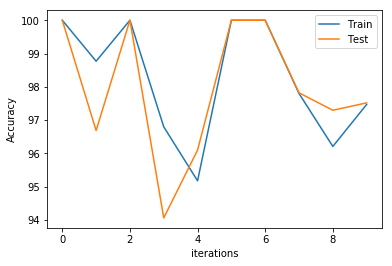

In [0]:
iterations = list(range(epochs))
plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('iterations')
plt.legend(loc='upper right')
plt.show()